# Lab12: Combining Multiple Learners
## Mehmet Gönen
### December 28, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dt

## Importing Data

In [2]:
# read data into memory
training_digits = np.genfromtxt("lab12_mnist_training_digits.csv", delimiter = ",")
training_labels = np.genfromtxt("lab12_mnist_training_labels.csv", delimiter = ",")
test_digits = np.genfromtxt("lab12_mnist_test_digits.csv", delimiter = ",")
test_labels = np.genfromtxt("lab12_mnist_test_labels.csv", delimiter = ",")

# get X and y values
X_train = training_digits / 255
y_train = training_labels.astype(int)
X_test = test_digits / 255
y_test = test_labels.astype(int)

# get number of classes and number of features
K = np.max(y_train)
D = X_train.shape[1]

## Construct an Ensemble by Training k-NN Classifiers on Feature Subsets

In [3]:
np.random.seed(421)
ensemble_size = 100
feature_subset_size = 75
N_test = X_test.shape[0]
k = 5

predicted_probabilities = np.zeros((N_test, K, ensemble_size))
for t in range(ensemble_size):
    print("training knn #{0}".format(t + 1))
    selected_features = np.random.choice(range(D), size = feature_subset_size, replace = False)
    distance_matrix = dt.cdist(X_test[:, selected_features], X_train[:, selected_features])
    for c in range(K):
        predicted_probabilities[:, c, t] = np.asarray([sum(y_train[np.argsort(distance_matrix[i, :])[range(k)]] == c + 1) for i in range(N_test)]) / k

training knn #1
training knn #2
training knn #3
training knn #4
training knn #5
training knn #6
training knn #7
training knn #8
training knn #9
training knn #10
training knn #11
training knn #12
training knn #13
training knn #14
training knn #15
training knn #16
training knn #17
training knn #18
training knn #19
training knn #20
training knn #21
training knn #22
training knn #23
training knn #24
training knn #25
training knn #26
training knn #27
training knn #28
training knn #29
training knn #30
training knn #31
training knn #32
training knn #33
training knn #34
training knn #35
training knn #36
training knn #37
training knn #38
training knn #39
training knn #40
training knn #41
training knn #42
training knn #43
training knn #44
training knn #45
training knn #46
training knn #47
training knn #48
training knn #49
training knn #50
training knn #51
training knn #52
training knn #53
training knn #54
training knn #55
training knn #56
training knn #57
training knn #58
training knn #59
traini

In [4]:
single_accuracies = np.zeros(ensemble_size)
combined_accuracies = np.zeros(ensemble_size)
for t in range(ensemble_size):
    y_predicted = np.argmax(predicted_probabilities[:, :, t], axis = 1) + 1
    single_accuracies[t] = np.mean(y_predicted == y_test)
    prediction = np.mean(predicted_probabilities[:, :, range(t + 1)], axis = 2)
    y_predicted = np.argmax(prediction, axis = 1) + 1
    combined_accuracies[t] = np.mean(y_predicted == y_test)

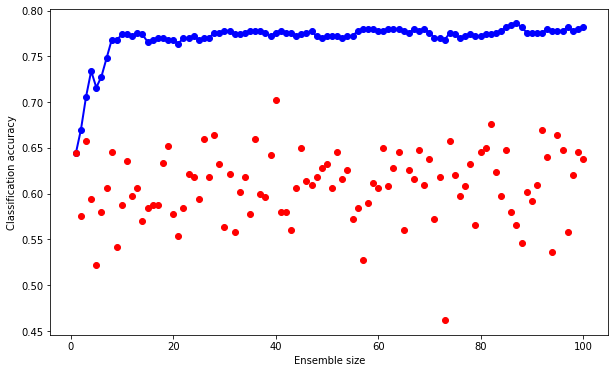

In [5]:
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, ensemble_size + 1), combined_accuracies, marker = "o", color = "blue", linewidth = 2)
plt.plot(np.arange(1, ensemble_size + 1), single_accuracies, marker = "o", color = "red", linestyle = "none")
plt.xlabel("Ensemble size")
plt.ylabel("Classification accuracy")
plt.show()

## Construct an Ensemble by Training k-NN k-NN Classifiers on Sample Subsets

In [6]:
np.random.seed(421)
ensemble_size = 100
sample_subset_size = 50
N_test = X_test.shape[0]
k = 5

predicted_probabilities = np.zeros((N_test, K, ensemble_size))
for t in range(ensemble_size):
    print("training knn #{0}".format(t + 1))
    selected_samples = np.concatenate([np.random.choice(np.flatnonzero(y_train == c + 1), size = sample_subset_size // K, replace = False) for c in range(K)])
    distance_matrix = dt.cdist(X_test, X_train[selected_samples, :])
    for c in range(K):
        predicted_probabilities[:, c, t] = np.asarray([sum(y_train[selected_samples][np.argsort(distance_matrix[i, :])[range(k)]] == c + 1) for i in range(N_test)]) / k

training knn #1
training knn #2
training knn #3
training knn #4
training knn #5
training knn #6
training knn #7
training knn #8
training knn #9
training knn #10
training knn #11
training knn #12
training knn #13
training knn #14
training knn #15
training knn #16
training knn #17
training knn #18
training knn #19
training knn #20
training knn #21
training knn #22
training knn #23
training knn #24
training knn #25
training knn #26
training knn #27
training knn #28
training knn #29
training knn #30
training knn #31
training knn #32
training knn #33
training knn #34
training knn #35
training knn #36
training knn #37
training knn #38
training knn #39
training knn #40
training knn #41
training knn #42
training knn #43
training knn #44
training knn #45
training knn #46
training knn #47
training knn #48
training knn #49
training knn #50
training knn #51
training knn #52
training knn #53
training knn #54
training knn #55
training knn #56
training knn #57
training knn #58
training knn #59
traini

In [7]:
single_accuracies = np.zeros(ensemble_size)
combined_accuracies = np.zeros(ensemble_size)
for t in range(ensemble_size):
    y_predicted = np.argmax(predicted_probabilities[:, :, t], axis = 1) + 1
    single_accuracies[t] = np.mean(y_predicted == y_test)
    prediction = np.mean(predicted_probabilities[:, :, range(t + 1)], axis = 2)
    y_predicted = np.argmax(prediction, axis = 1) + 1
    combined_accuracies[t] = np.mean(y_predicted == y_test)

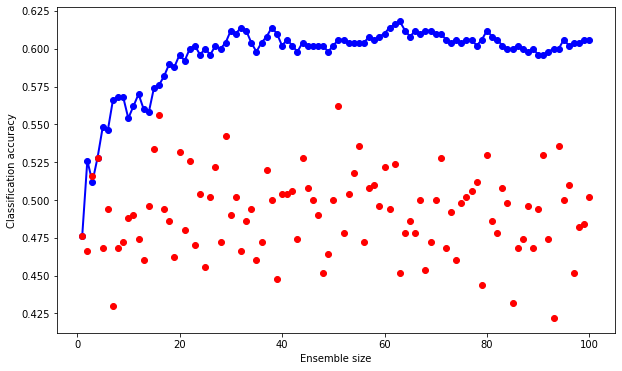

In [8]:
plt.figure(figsize = (10, 6))
plt.plot(np.arange(1, ensemble_size + 1), combined_accuracies, marker = "o", color = "blue", linewidth = 2)
plt.plot(np.arange(1, ensemble_size + 1), single_accuracies, marker = "o", color = "red", linestyle = "none")
plt.xlabel("Ensemble size")
plt.ylabel("Classification accuracy")
plt.show()